#### ML Analysis #4 - Random Forest Classifier
Cindy Rocha

In [7]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Load the (preprocessed) data
df = pd.read_csv("ckd_preprocessed.csv")

label_encoder = LabelEncoder()

object_columns_list = df.select_dtypes(include=['object']).columns.tolist()

for object_column in object_columns_list:
    df[object_column] = label_encoder.fit_transform(df[object_column])

X = df.drop('classification', axis=1)
y = df['classification']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees. Each tree is trained on a random subset of data to produce a more accurate and stable result. This reduces the risk of overfitting compared to a single decision tree. 

Let's leaf the decision to the model and see what it shows us!

In [9]:
# n_estimators, default=100 trees in the forest :^)
forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

print("\n*Classification Report*")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.98
Precision: 1.0
Recall: 0.9459459459459459
F1 Score: 0.9722222222222222

*Classification Report*
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.95      0.97        37

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



We can see that the model is quite impressive. It is correctly predicting 98% of the samples. There are no false negative meaning that no cases of CKD were missed! Recall is crucial in predicting whether a patient has a disease or not (in this case CKD) and this model achieves optimal recall. Moreover, only 2 patients were incorrectly classified as having CKD. We can see this in the confusion matrix below. 

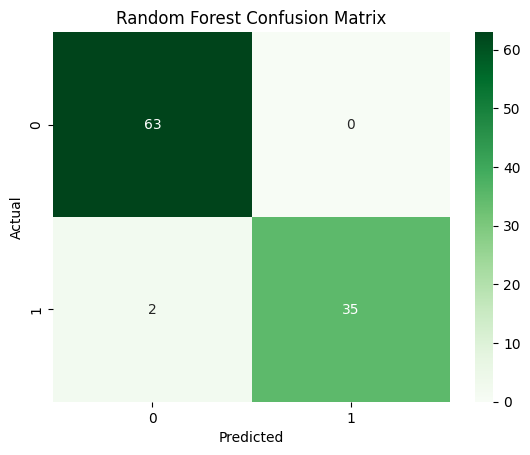

In [10]:
rf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_matrix, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

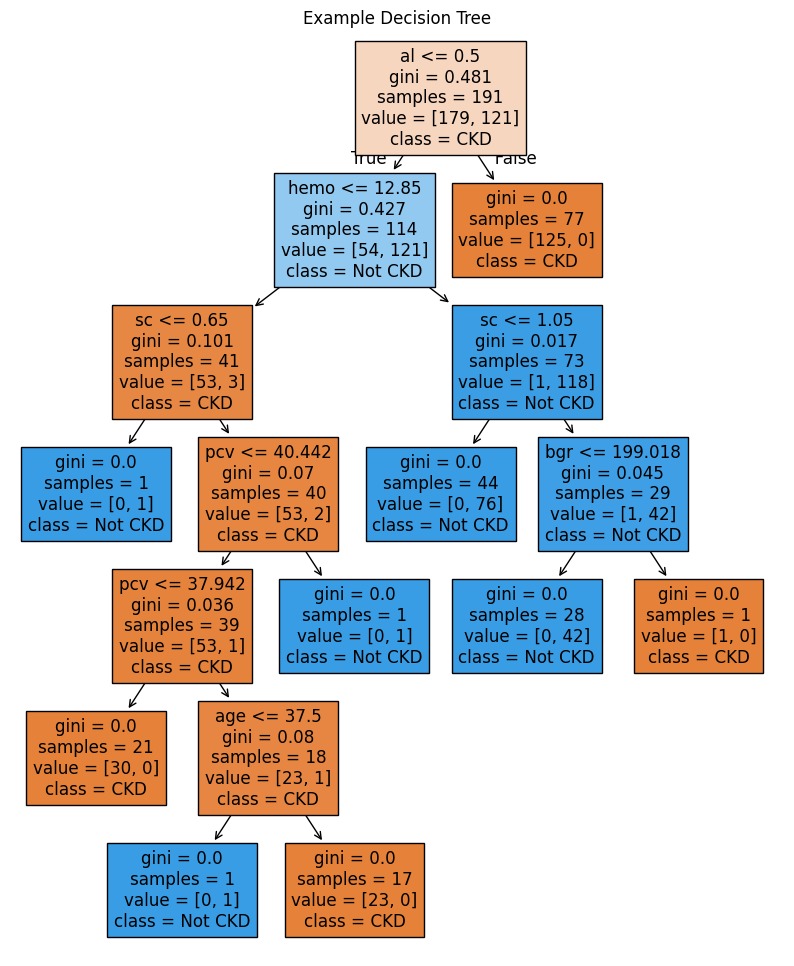

In [11]:
plt.figure(figsize=(10, 12))
plot_tree(forest.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=['CKD', 'Not CKD'],
          filled=True)
plt.title("Example Decision Tree")
plt.show()

The root node splits at albumin levels showing that some presence of albumin in urine is a strong indicator of CKD.

Some indicators include of low serum creatinine and low puss cell volume according to one of the decision trees.

Below we can see the that the top three importance features of this random forest classifier are:

    1. hemoglobin
    2. puss cell volume
    3. specific gravity

In [12]:
imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': forest.feature_importances_})
imp = imp.sort_values(by='Importance', ascending=False)
print(imp)

   Feature  Importance
14    hemo    0.288362
15     pcv    0.138451
2       sg    0.102150
17      rc    0.096528
11      sc    0.084718
3       al    0.062278
9      bgr    0.040544
18     htn    0.039279
19      dm    0.038908
10      bu    0.020685
12     sod    0.016893
1       bp    0.012558
0      age    0.011043
21   appet    0.011039
4       su    0.009752
16      wc    0.007387
13     pot    0.004503
5      rbc    0.004234
22      pe    0.003896
6       pc    0.002870
23     ane    0.002517
8       ba    0.000691
7      pcc    0.000410
20     cad    0.000304
